## Credit Card Fraud Detection

### Contributed By : Kanhu Charan Mishra

 The aim of this project is to project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

### Problem Statement:
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

### Data Understanding :
Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.



## Project pipeline
The project pipeline can be briefly summarised in the following four steps:

### Data Understanding: 
Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
### Exploratory data analytics (EDA):
Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
### Train/Test split:
Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
### Model building / hyperparameter tuning:
This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
### Model evaluation:
Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [94]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Checking the dataframe SHAPE
df.shape

(284807, 30)

In [5]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Handling Missing Values** 

In [7]:
df.isnull().sum().sum()

0

#### We can see there are no Null Values

#### Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

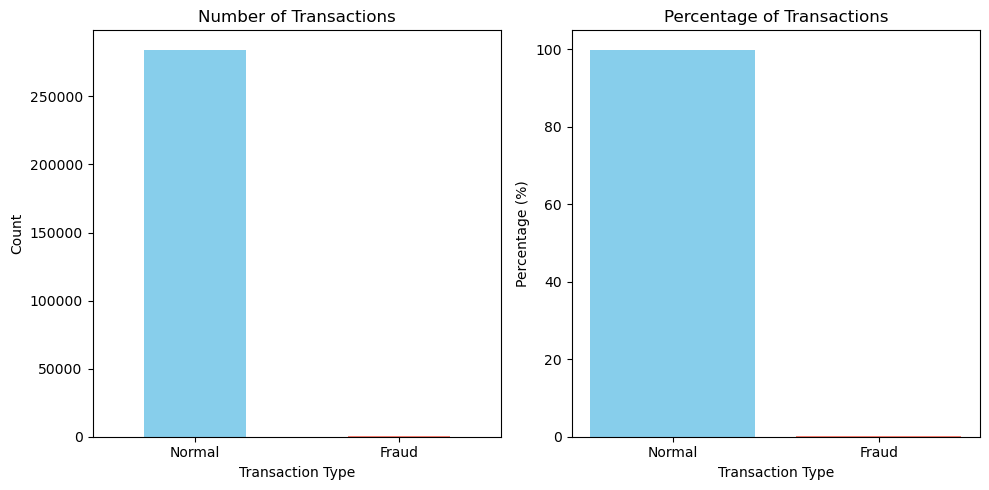

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Plot the number of transactions for each class
plt.figure(figsize=(10, 5))

# Bar plot for the counts
plt.subplot(1, 2, 1)
classes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Fraud'], rotation=0)

# Bar plot for the percentage of transactions for each class
plt.subplot(1, 2, 2)
plt.bar(['Normal', 'Fraud'], [normal_share, fraud_share], color=['skyblue', 'salmon'])
plt.title('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

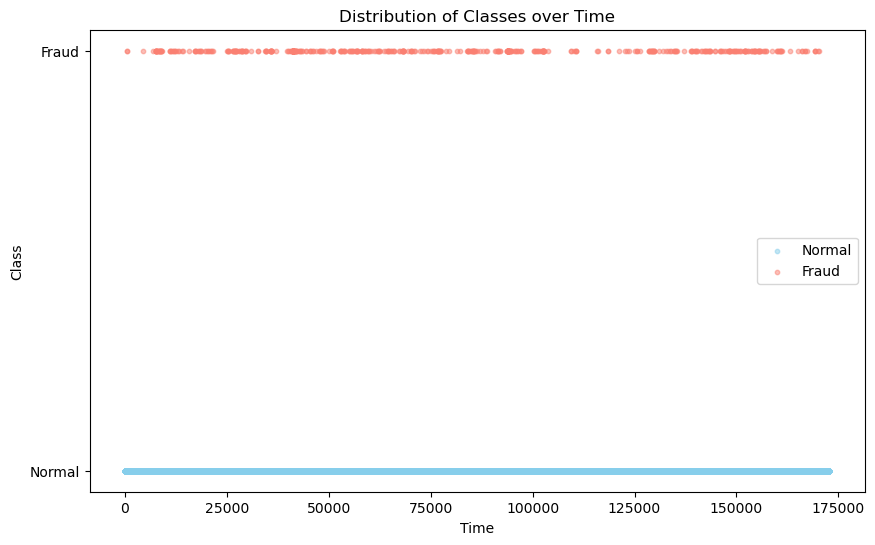

In [10]:
# Create a scatter plot to observe the distribution of classes with time
import matplotlib.pyplot as plt

# Scatter plot of Time vs Class
plt.figure(figsize=(10, 6))

# Plot normal transactions (Class = 0)
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Class'], 
            color='skyblue', label='Normal', alpha=0.5, s=10)

# Plot fraudulent transactions (Class = 1)
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Class'], 
            color='salmon', label='Fraud', alpha=0.5, s=10)

# Adding titles and labels
plt.title('Distribution of Classes over Time')
plt.xlabel('Time')
plt.ylabel('Class')
plt.yticks([0, 1], labels=['Normal', 'Fraud'])
plt.legend()

plt.show()

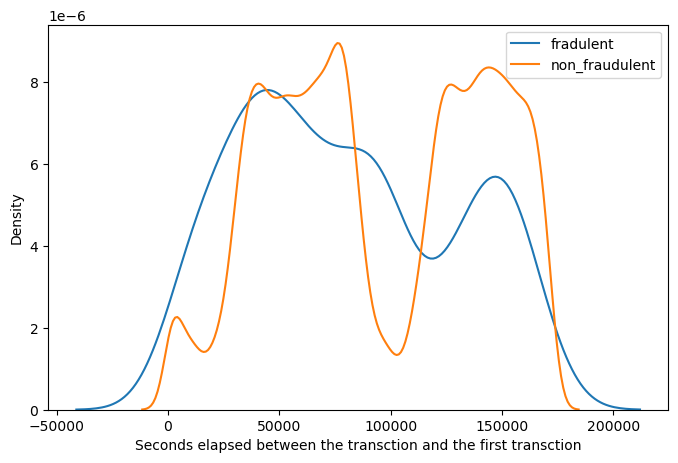

In [14]:
data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(8, 5))
ax = sns.distplot(data_fraud['Time'], label='fradulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non_fraudulent', hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(loc='best')
plt.show()

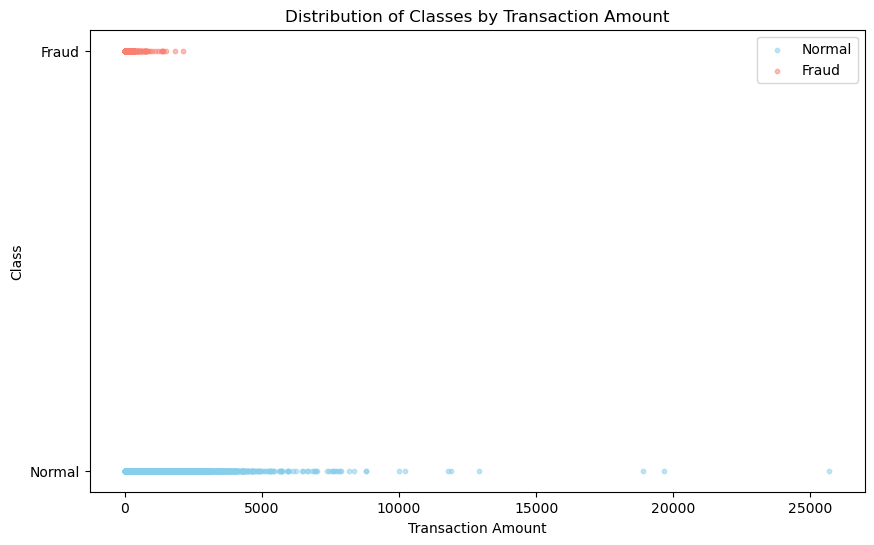

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
import matplotlib.pyplot as plt

# Scatter plot of Amount vs Class
plt.figure(figsize=(10, 6))

# Plot normal transactions (Class = 0)
plt.scatter(df[df['Class'] == 0]['Amount'], df[df['Class'] == 0]['Class'], 
            color='skyblue', label='Normal', alpha=0.5, s=10)

# Plot fraudulent transactions (Class = 1)
plt.scatter(df[df['Class'] == 1]['Amount'], df[df['Class'] == 1]['Class'], 
            color='salmon', label='Fraud', alpha=0.5, s=10)

# Adding titles and labels
plt.title('Distribution of Classes by Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Class')
plt.yticks([0, 1], labels=['Normal', 'Fraud'])
plt.legend()

plt.show()


**Drop unnecessary columns**

**Interpretation**  
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [16]:
# dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [17]:
# re-checking the dataframe
df.shape

(284807, 30)

### Splitting the data into train & test data

In [20]:
y = df['Class']  # class variable

In [21]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop('Class', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

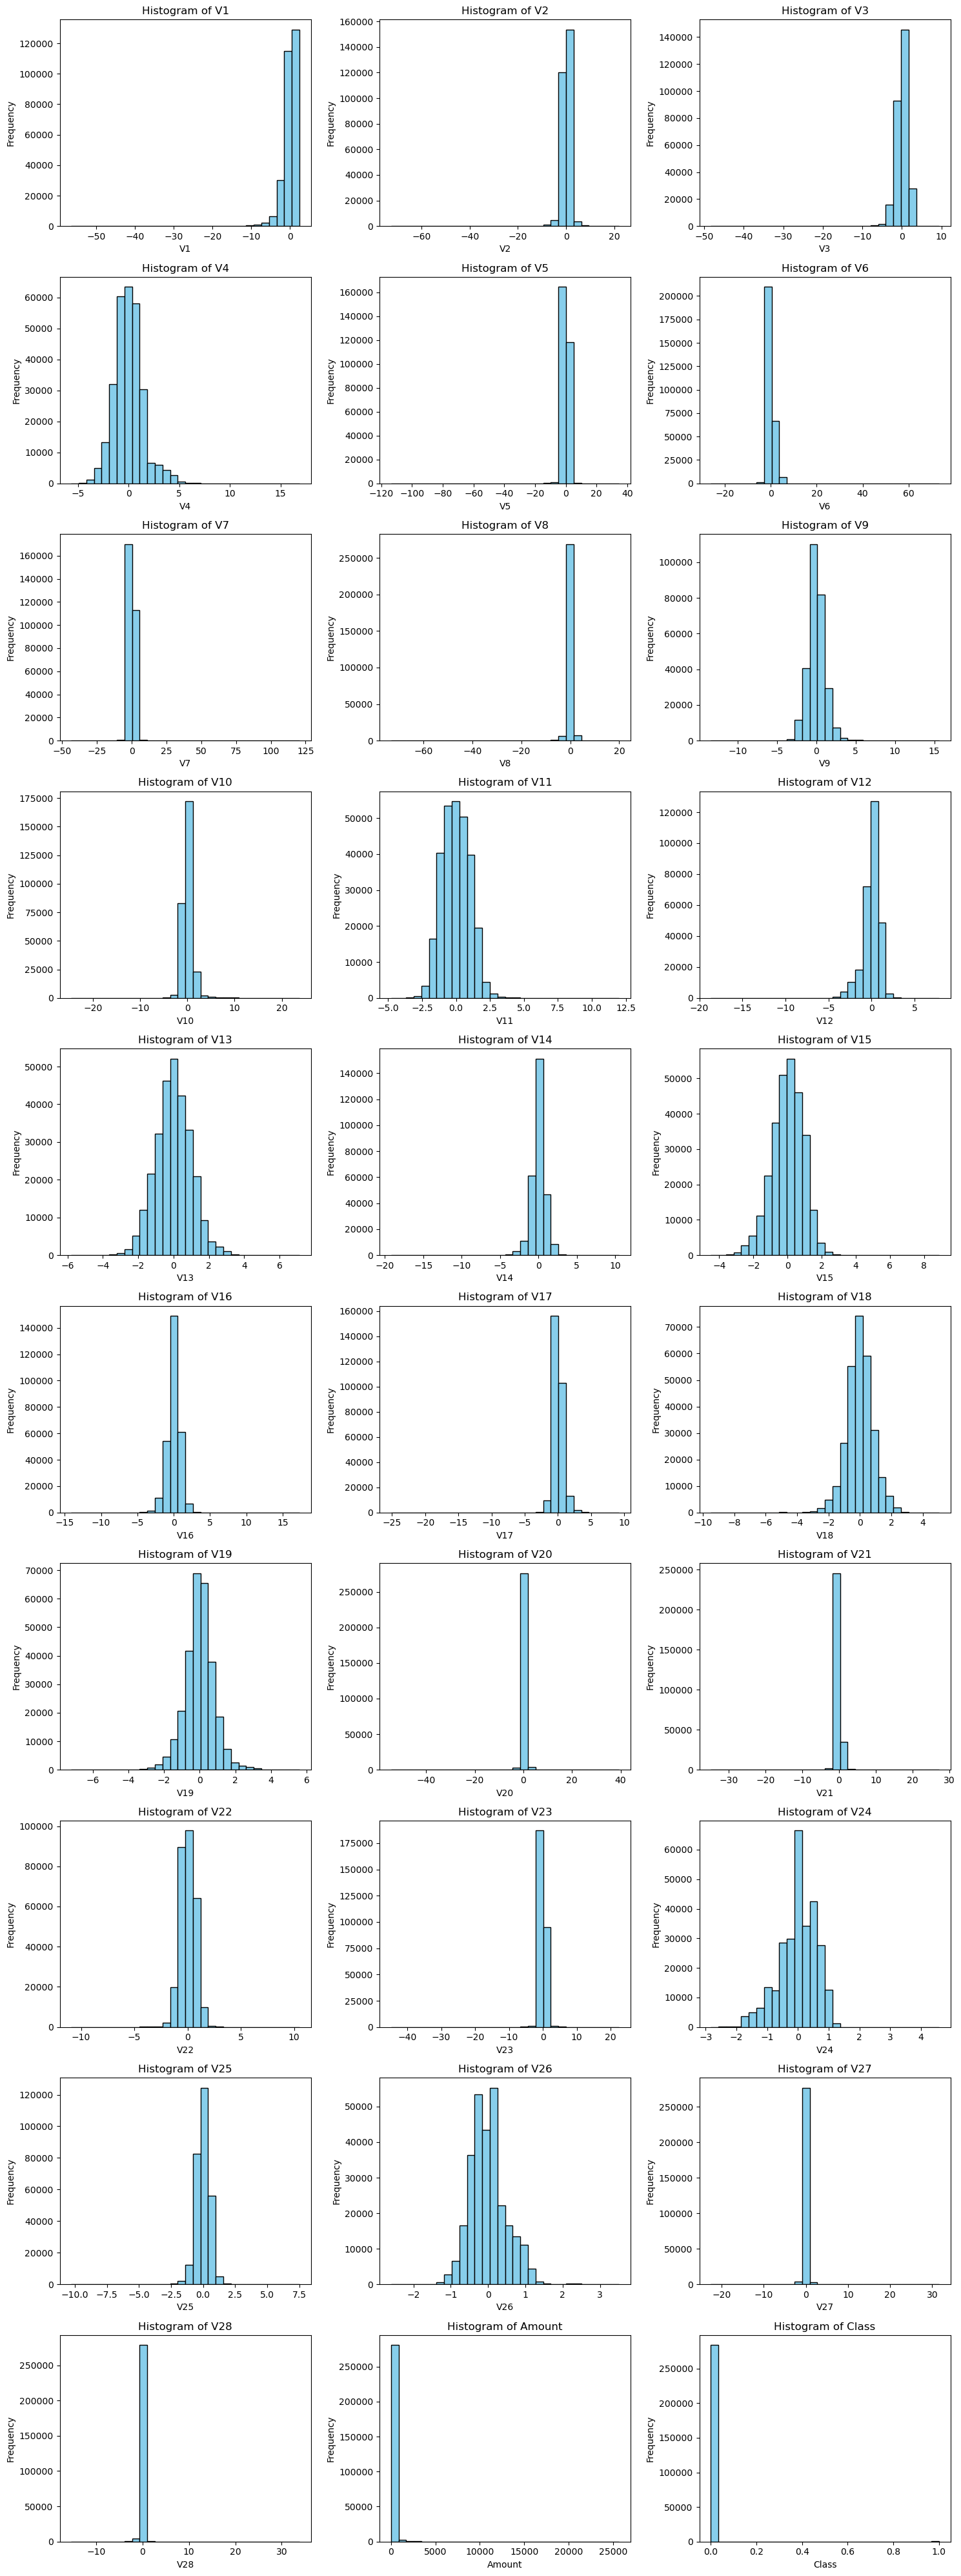

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt

def plot_histograms(df):
    # Set up the plot grid
    df_columns = df.columns
    n_cols = 3
    n_rows = (len(df_columns) + n_cols - 1) // n_cols  # calculate rows based on number of columns
    
    plt.figure(figsize=(15, n_rows * 4))
    
    for i, column in enumerate(df_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call the function on the dataset
plot_histograms(df)


In [27]:
df.describe()
## checking if scaling is required or not

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

**Scaling the dataset Amount field before treating skewness**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
## Scaling train dataset
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,...,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,-0.339748
247823,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,...,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,4.277740
152342,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,...,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,-0.053399
103385,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,...,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,-0.335956
8771,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,...,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,-0.199244


In [33]:
## Scaling test dataset
X_test['Amount'] = scaler.fit_transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.206134
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.885364
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.245240
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.373741
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.376399


#### Rechecking for data skewness 

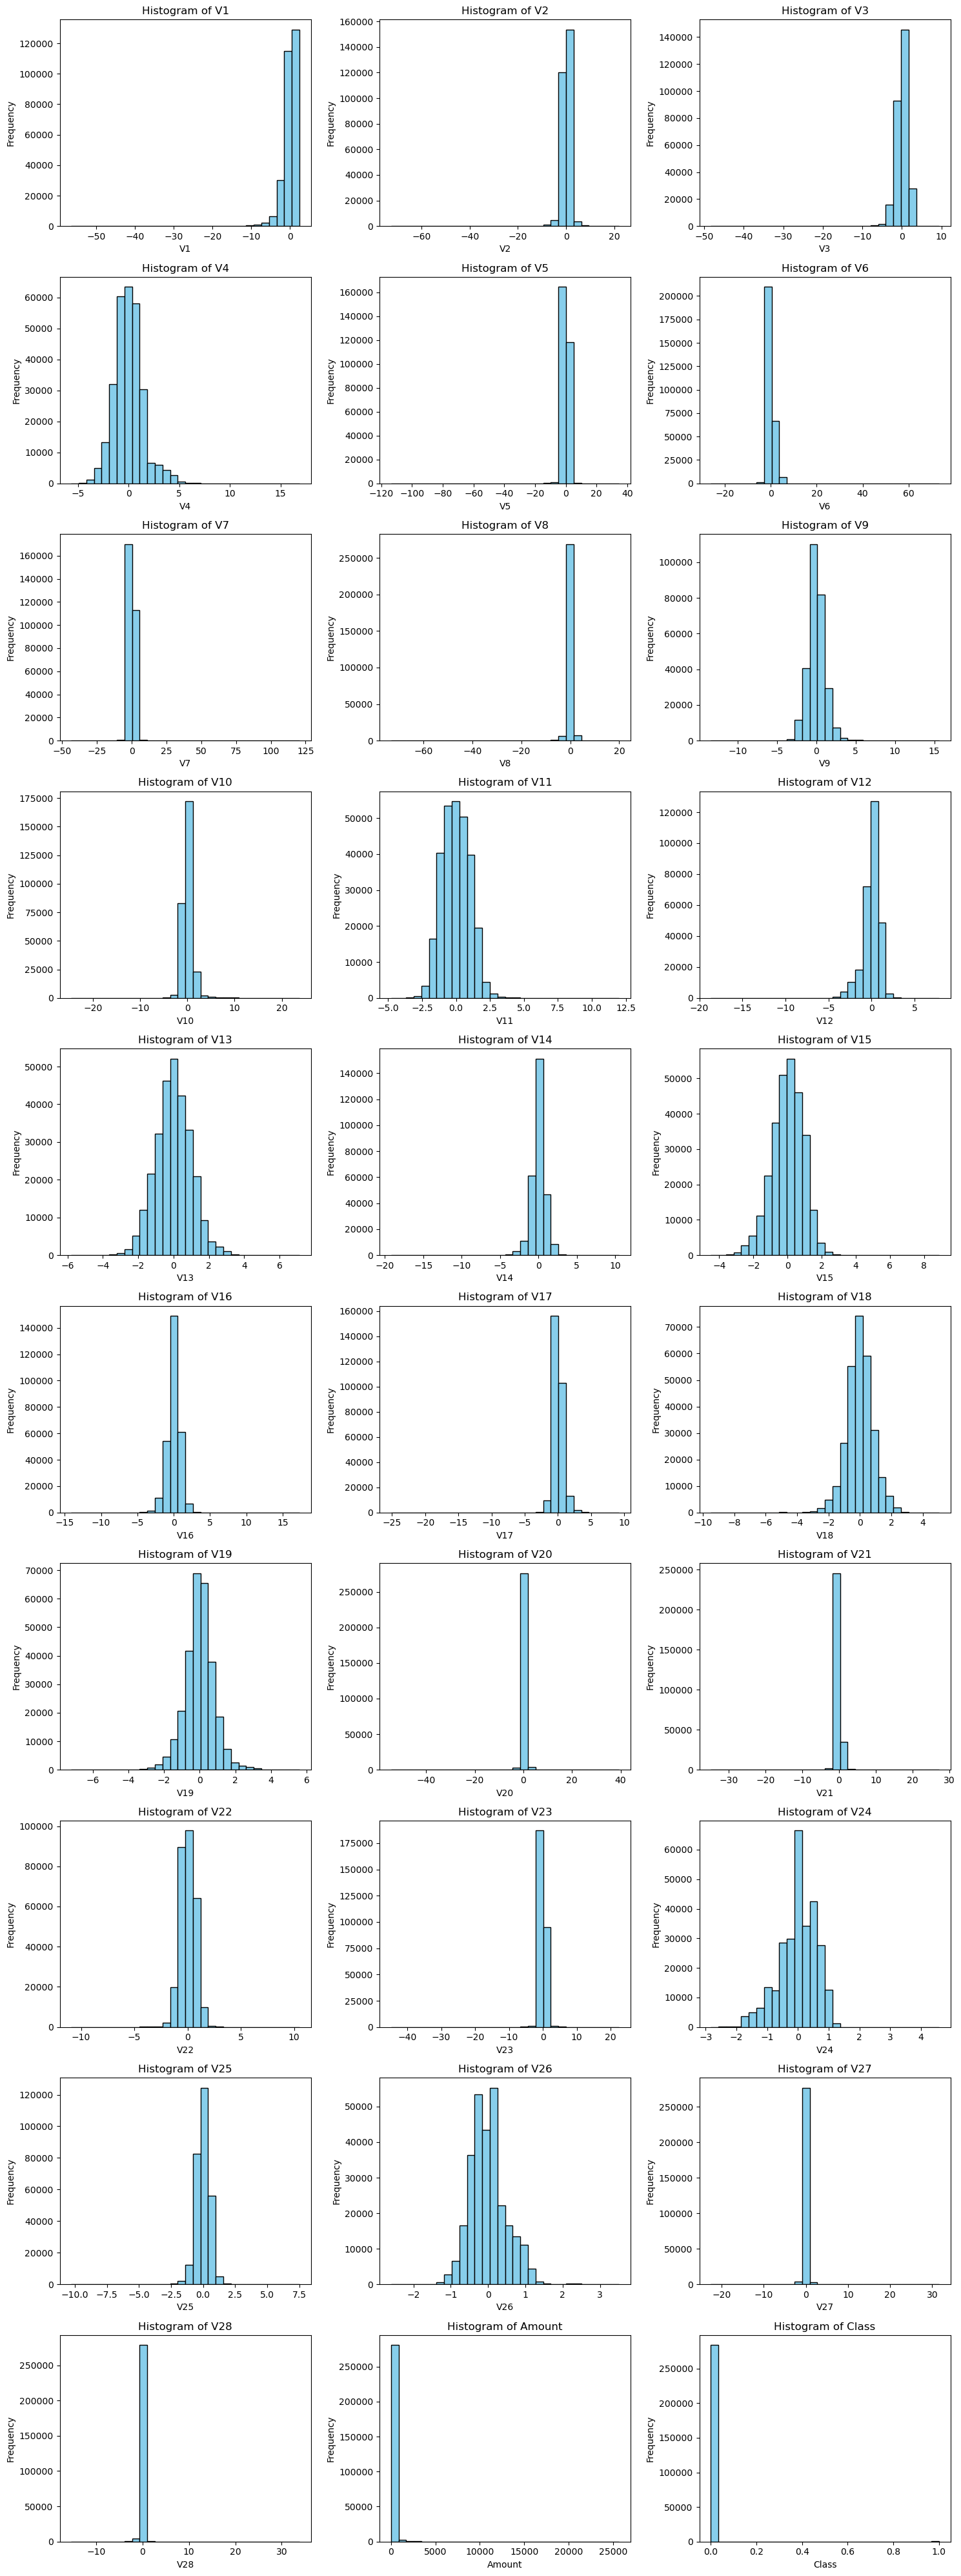

In [34]:
# plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt

def plot_histograms(df):
    # Set up the plot grid
    df_columns = df.columns
    n_cols = 3
    n_rows = (len(df_columns) + n_cols - 1) // n_cols  # calculate rows based on number of columns
    
    plt.figure(figsize=(15, n_rows * 4))
    
    for i, column in enumerate(df_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_histograms(df)


**We can observe skewness in certain variables, hence using PowerTransformer to mitigate the same**

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [123]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

# # Instantiate the powertransformer
# power_transformer = 

# # Fit and transform the PT on training data
# X_train[cols] = power_transformer.fit_transform(X_train)

# # Transform the test set
# X_test = power_transformer.transform(X_test)

power_transformer = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the training data
X_train_transformed = power_transformer.fit_transform(X_train)

# Transform the test data
X_test_transformed = power_transformer.transform(X_test)

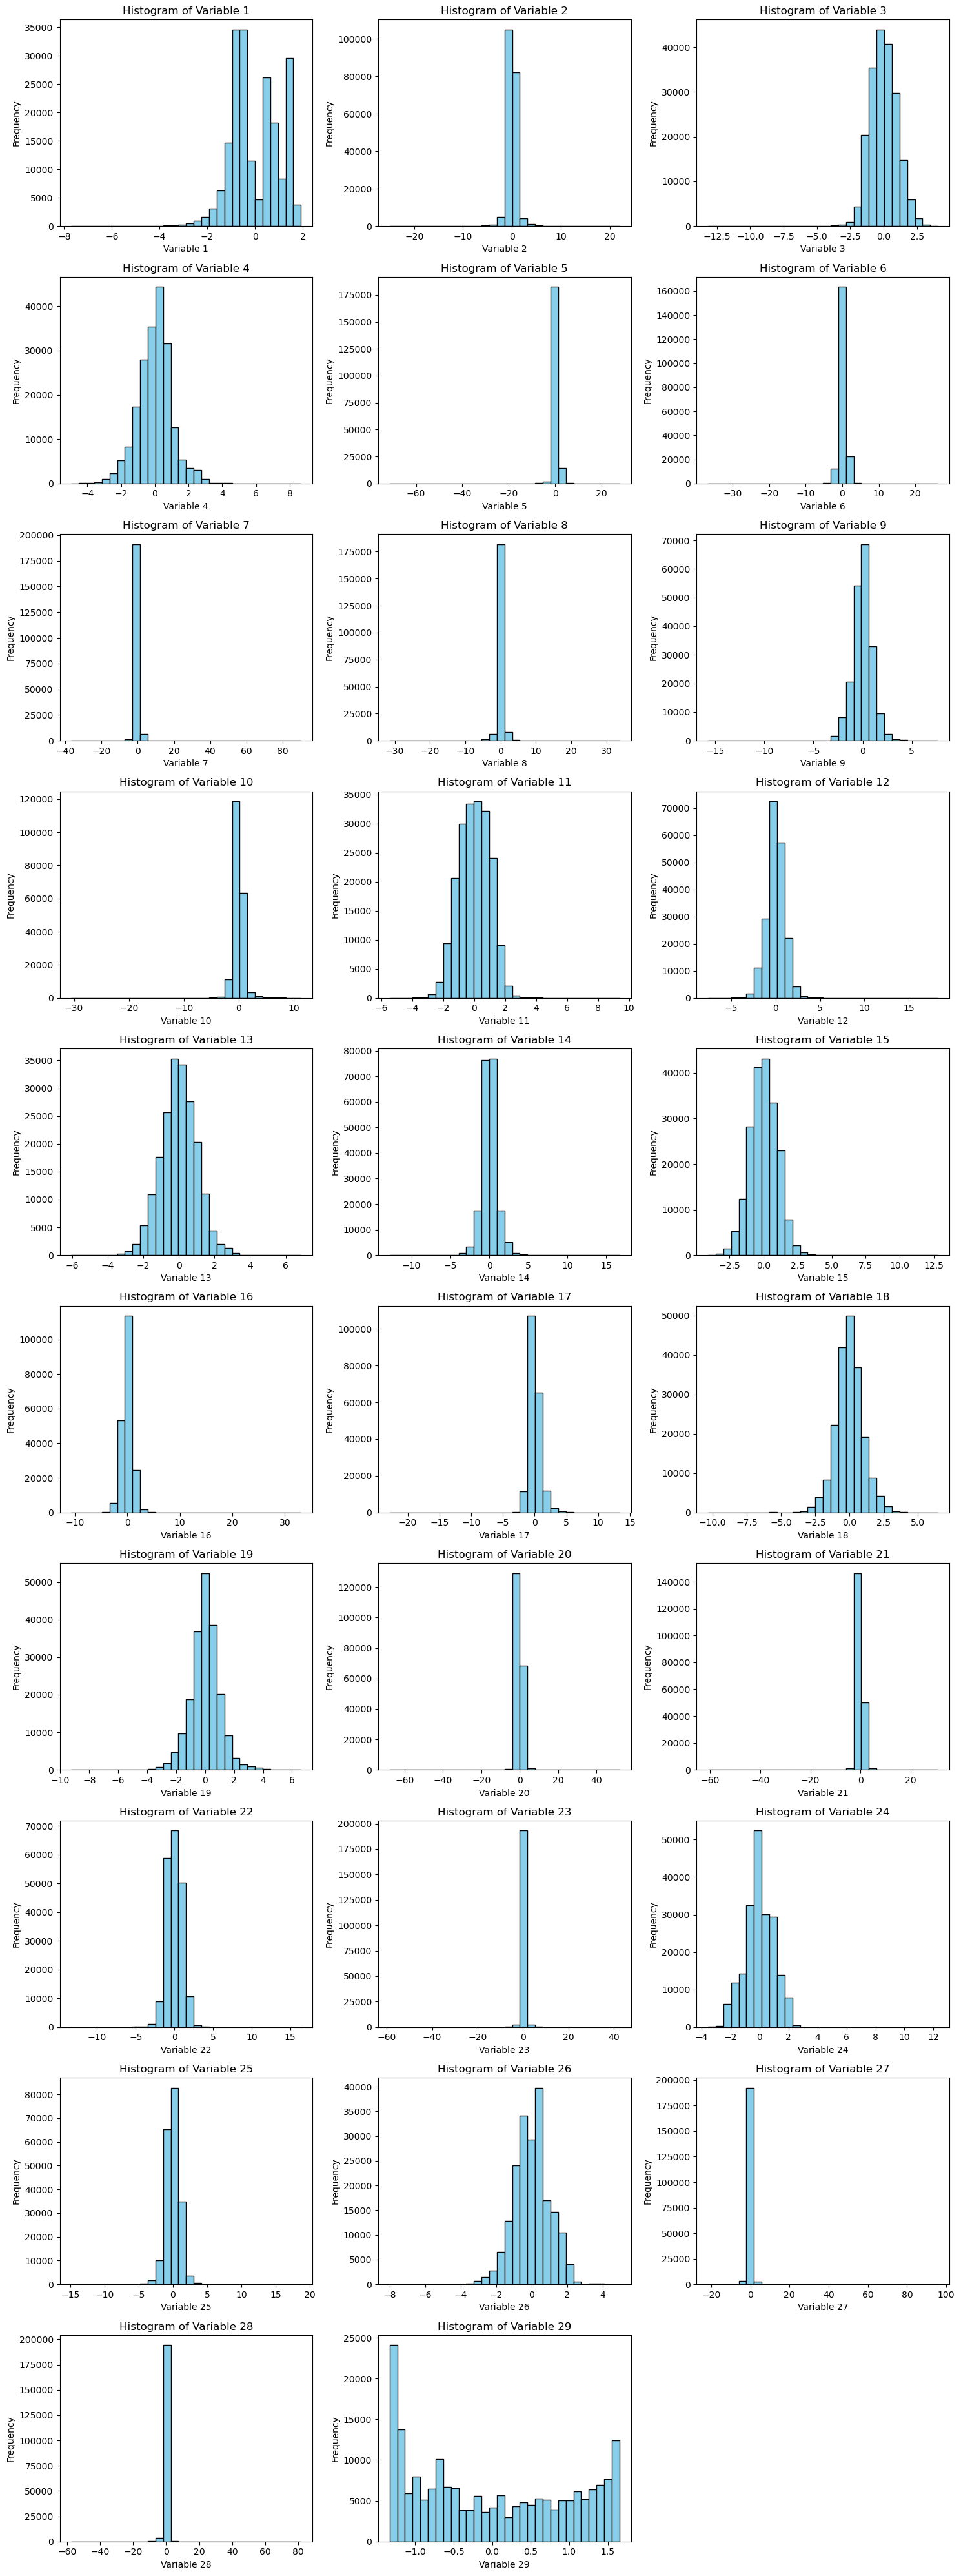

In [47]:
# plot the histogram of a variable from the dataset again to see the result 
def plot_histograms_transformed(X_transformed):
    # Set up the plot grid
    n_cols = 3
    n_rows = (X_train.shape[1] + n_cols - 1) // n_cols  # calculate rows based on number of columns
    
    plt.figure(figsize=(15, n_rows * 4))
    
    for i in range(X_transformed.shape[1]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(X_transformed[:, i], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of Variable {i+1}')
        plt.xlabel(f'Variable {i+1}')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_histograms_transformed(X_train_transformed)

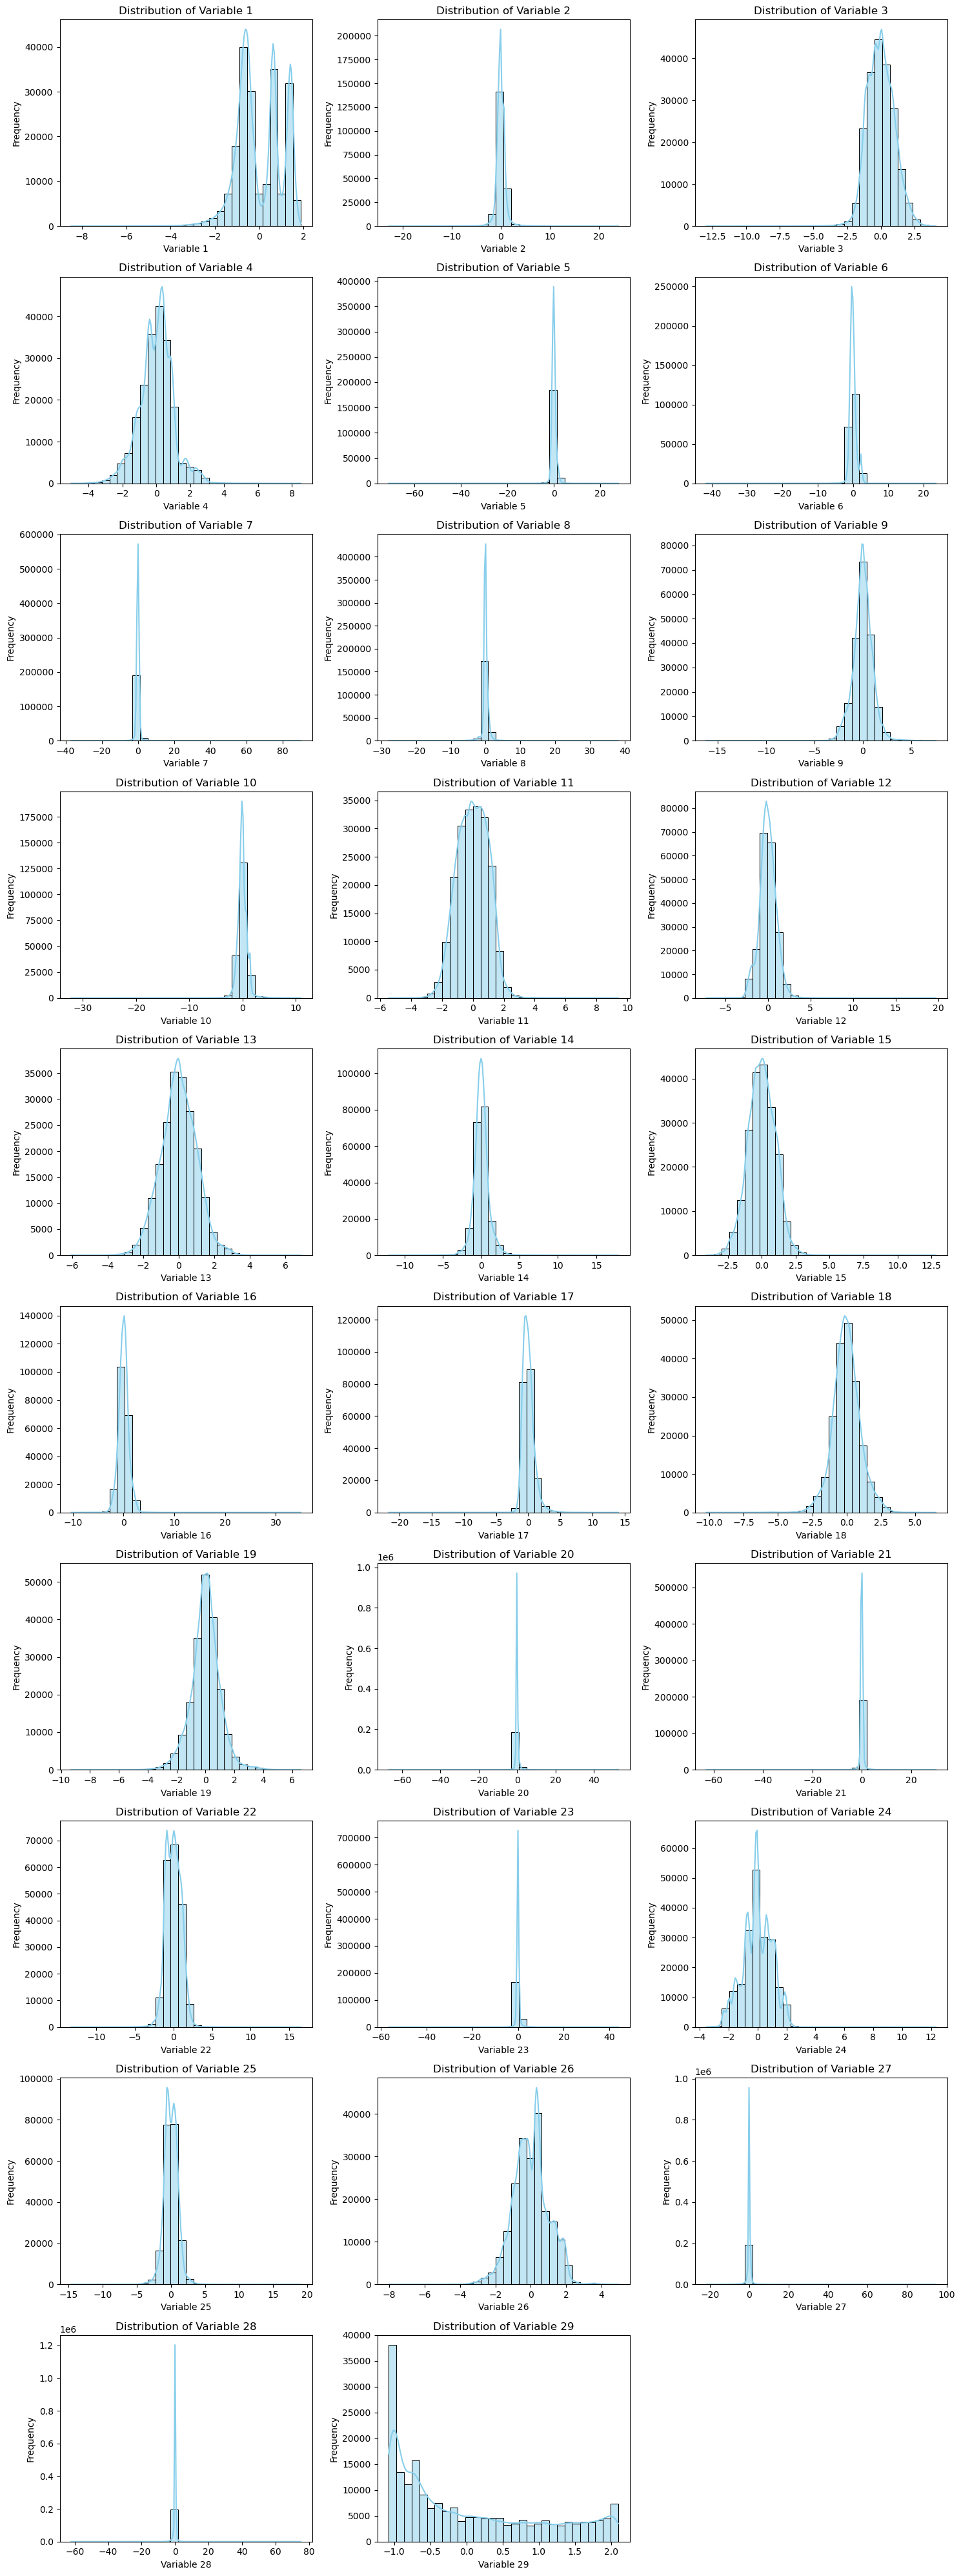

In [44]:
def plot_distplots_transformed(X_transformed):
    # Set up the plot grid
    n_cols = 3
    n_rows = (X_transformed.shape[1] + n_cols - 1) // n_cols  # calculate rows based on number of columns
    
    plt.figure(figsize=(15, n_rows * 4))
    
    for i in range(X_transformed.shape[1]):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(X_transformed[:, i], bins=30, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of Variable {i+1}')
        plt.xlabel(f'Variable {i+1}')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_distplots_transformed(X_train_transformed)

**Now we can see that all the variables seem to be normallly distributed after transformation**

## Imbalanced Model Building
- Build different models on the imbalanced dataset and see the result

## 1.Logistic Regression

In [62]:
from sklearn import linear_model #import the package
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Defining values of regularization strength (C) and number of cross-validation folds
num_C = [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strengths
cv_num = [5, 10]  # Different numbers of cross-validation folds

[CV] END ..........C=10, class_weight=None, solver=newton-cg; total time=   1.2s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   1.2s
[CV] END .........C=0.1, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=0.1, class_weight=None, solver=liblinear; total time=   0.8s
[CV] END .......C=1, class_weight=balanced, solver=liblinear; total time=   1.3s
[CV] END ...........C=1, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END ...........C=1, class_weight=None, solver=liblinear; total time=   0.9s
[CV] END ...............C=1, class_weight=None, solver=lbfgs; total time=   0.4s
[CV] END ......C=10, class_weight=balanced, solver=newton-cg; total time=   1.8s
[CV] END ..........C=10, class_weight=None, solver=newton-cg; total time=   1.2s
[CV] END .....C=100, class_w

In [49]:
# Modularizing evaluation of Logistic Regression with different C values
def evaluate_logistic_regression(X_train, y_train, cv_num):
    results = {}
    
    for C in num_C:
        # Create a Logistic Regression model
        model = linear_model.LogisticRegression(C=C, solver='liblinear', class_weight='balanced')
        
        # Perform cross-validation
        grid = GridSearchCV(model, param_grid={}, cv=cv_num, scoring='f1')
        grid.fit(X_train, y_train)
        
        # Store the best score and model
        results[C] = {
            'best_score': grid.best_score_,
            'best_model': grid.best_estimator_
        }
        
    return results


In [50]:
# Evaluate the Logistic Regression models
results = evaluate_logistic_regression(X_train_transformed, y_train, cv_num[0])  # Using first cv_num value
print("Logistic Regression Results:")
for C, result in results.items():
    print(f"C: {C}, Best Score: {result['best_score']:.4f}")

# Optionally, you can evaluate the best model on the test set
best_model = results[min(results, key=lambda x: results[x]['best_score'])]['best_model']
y_pred = best_model.predict(X_test_transformed)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Results:
C: 0.001, Best Score: 0.1160
C: 0.01, Best Score: 0.1060
C: 0.1, Best Score: 0.1008
C: 1, Best Score: 0.1003
C: 10, Best Score: 0.1001
C: 100, Best Score: 0.1001

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [52]:
from sklearn.model_selection import StratifiedKFold

# Set the number of splits for cross-validation
n_splits = 5  # You can change this number based on your preference

# Create Stratified K-Folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to hold the results
X_train_cv = []
X_test_cv = []
y_train_cv = []
y_test_cv = []

# Iterate through the splits
for train_index, test_index in skf.split(X_train_transformed, y_train):
    X_train_cv.append(X_train_transformed[train_index])
    X_test_cv.append(X_train_transformed[test_index])
    y_train_cv.append(y_train.iloc[train_index].values)  # Ensure y_train is converted to NumPy array
    y_test_cv.append(y_train.iloc[test_index].values)

# Check the shapes of the resulting lists
print("Shapes of Cross-Validated Data:")
for i in range(n_splits):
    print(f"Fold {i+1}:")
    print(f"X_train_cv: {X_train_cv[i].shape}, X_test_cv: {X_test_cv[i].shape}")
    print(f"y_train_cv: {y_train_cv[i].shape}, y_test_cv: {y_test_cv[i].shape}")


Shapes of Cross-Validated Data:
Fold 1:
X_train_cv: (159491, 29), X_test_cv: (39873, 29)
y_train_cv: (159491,), y_test_cv: (39873,)
Fold 2:
X_train_cv: (159491, 29), X_test_cv: (39873, 29)
y_train_cv: (159491,), y_test_cv: (39873,)
Fold 3:
X_train_cv: (159491, 29), X_test_cv: (39873, 29)
y_train_cv: (159491,), y_test_cv: (39873,)
Fold 4:
X_train_cv: (159491, 29), X_test_cv: (39873, 29)
y_train_cv: (159491,), y_test_cv: (39873,)
Fold 5:
X_train_cv: (159492, 29), X_test_cv: (39872, 29)
y_train_cv: (159492,), y_test_cv: (39872,)


In [54]:
#perform cross validation
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a list to hold the results for each fold
results = []

# Iterate through the cross-validation folds
for i in range(len(X_train_cv)):
    # Create a logistic regression model
    model = linear_model.LogisticRegression(solver='liblinear', class_weight='balanced')
    
    # Fit the model on the training data for the current fold
    model.fit(X_train_cv[i], y_train_cv[i])
    
    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_cv[i])
    
    # Store the results (classification report and confusion matrix)
    results.append({
        'fold': i + 1,
        'classification_report': classification_report(y_test_cv[i], y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test_cv[i], y_pred)
    })

# Print the results for each fold
for result in results:
    print(f"\n{'-'*20} Fold {result['fold']} {'-'*20}")
    
    # Print the confusion matrix in a DataFrame
    cm = result['confusion_matrix']
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    
    print("Confusion Matrix:")
    print(cm_df)
    
    # Format the classification report for better readability
    report_df = pd.DataFrame(result['classification_report']).transpose()
    
    print("\nClassification Report:")
    print(report_df[['precision', 'recall', 'f1-score', 'support']])
    
    print("\n" + "-"*50)



-------------------- Fold 1 --------------------
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        38683         1119
Actual 1            6           65

Classification Report:
              precision    recall  f1-score       support
0              0.999845  0.971886  0.985667  39802.000000
1              0.054899  0.915493  0.103586     71.000000
accuracy       0.971785  0.971785  0.971785      0.971785
macro avg      0.527372  0.943689  0.544626  39873.000000
weighted avg   0.998162  0.971785  0.984096  39873.000000

--------------------------------------------------

-------------------- Fold 2 --------------------
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        38636         1166
Actual 1            5           66

Classification Report:
              precision    recall  f1-score       support
0              0.999871  0.970705  0.985072  39802.000000
1              0.053571  0.929577  0.101305     71.000000
accuracy       0.970632  0.97063

In [59]:
#perform hyperparameter tuning && print the evaluation result by choosing a evaluation metric

from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],  # Choose solvers that support class_weight
    'class_weight': ['balanced', None]  # Consider both balanced and unbalanced class weights
}

# Initialize the logistic regression model
model = linear_model.LogisticRegression()

# Set up GridSearchCV with verbose output
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)  # Set verbose=2 for detailed output

# Fit GridSearchCV to the entire training data
print("Starting hyperparameter tuning...")
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("\nBest Parameters:", best_params)
print("Best Cross-Validation Score (F1):", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

Starting hyperparameter tuning...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..............C=10, class_weight=None, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   1.0s
[CV] END .............C=100, class_weight=None, solver=lbfgs; total time=   0.4s
[CV] END ...C=0.001, class_weight=balanced, solver=newton-cg; total time=   1.3s
[CV] END ..........C=10, class_weight=None, solver=newton-cg; total time=   0.9s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.4s
[CV] END .........C=100, class_weight=None, solver=liblinear; total time=   1.0s
[CV] END .........C=100, class_weight=None, solver=newton-cg; total time=   1.0s
[CV] END ...C

In [61]:
# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))



Evaluation Results:
F1-Score: 0.7552
Accuracy: 0.9993
ROC AUC Score: 0.9824
Area Under Precision-Recall Curve (AUC-PR): 0.7863

Confusion Matrix:
True Negatives (TN): 85293
False Positives (FP): 14
False Negatives (FN): 45
True Positives (TP): 91

Detailed Statistics:
Precision: 0.8667
Recall: 0.6691
Specificity: 0.9998

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.67      0.76       136

    accuracy                           1.00     85443
   macro avg       0.93      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:

#print the optimum value of hyperparameters
# Print the best parameters
best_params = grid_search.best_params_
print("\nOptimum Hyperparameters:")
print(best_params)


Optimum Hyperparameters:
{'C': 10, 'class_weight': None, 'solver': 'newton-cg'}


## 2. KNN

In [91]:
!pip install --force-reinstall threadpoolctl

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import numpy as np

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],          # List of values for n_neighbors
    'weights': ['uniform', 'distance'],           # Choose between uniform and distance weighting
    'metric': ['euclidean', 'manhattan']          # Distance metrics to consider
}

# Initialize the KNN model
model = KNeighborsClassifier()

# Set up RandomizedSearchCV with verbose output
n_iter_search = 3  # Number of parameter settings to sample
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# # Fit RandomizedSearchCV to the entire training data
# print("Starting hyperparameter tuning...")
# random_search.fit(X_train_transformed, y_train)


[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean,

#### Skipping KNN as the scores are very low upon testing

## 3. SVM

In [82]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import time

# Assuming your features and labels are already defined
# X_train_transformed, y_train, X_test_transformed, y_test

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],                   # Degree of polynomial kernel, ignored by others
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'class_weight': [None, 'balanced']     # Weights for handling class imbalance
}

# Initialize the SVM model
model = SVC(probability=True, random_state=42)

# Set up RandomizedSearchCV to reduce the number of fits
n_iter_search = 1  # Number of parameter settings to sample
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the entire training data
print("Starting hyperparameter tuning...")
start_time = time.time()
random_search.fit(X_train_transformed, y_train)
end_time = time.time()
print("Hyperparameter tuning completed.")
print(f"Time taken for hyperparameter tuning: {end_time - start_time:.2f} seconds")

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters
print("\nOptimum Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class
print("Evaluation completed.")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters chosen at the end
print("\nBest Hyperparameters Chosen:")
print(best_params)

Starting hyperparameter tuning...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric

## 4.Decision Tree

In [69]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Assuming your features and labels are already defined
# X_train_transformed, y_train, X_test_transformed, y_test

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criteria
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Set up GridSearchCV with verbose output
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)  # Set verbose=1 for minimal output

# Fit GridSearchCV to the entire training data
print("Starting hyperparameter tuning...")
grid_search.fit(X_train_transformed, y_train)
print("Hyperparameter tuning completed.")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("\nOptimum Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class
print("Evaluation completed.")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters chosen at the end
print("\nBest Hyperparameters Chosen:")
print(best_params)


Starting hyperparameter tuning...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Hyperparameter tuning completed.

Optimum Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Evaluating the best model on the test set...
Evaluation completed.

Evaluation Results:
F1-Score: 0.8527
Accuracy: 0.9996
ROC AUC Score: 0.9224
Area Under Precision-Recall Curve (AUC-PR): 0.7421

Confusion Matrix:
TN: 85295, FP: 12, FN: 26, TP: 110

Detailed Statistics:
Precision: 0.9016
Recall: 0.8088
Specificity: 0.9999

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.90      0.81      0.85       136

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Best Hyperparameters Chosen:
{'criterion': 'gini', 'max_depth': 10, 'min_

## 5. Random Forest

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import time

# Assuming your features and labels are already defined
# X_train_transformed, y_train, X_test_transformed, y_test

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
}

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV to reduce the number of fits
n_iter_search = 5  # Number of parameter settings to sample
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the entire training data
print("Starting hyperparameter tuning...")
start_time = time.time()
random_search.fit(X_train_transformed, y_train)
end_time = time.time()
print("Hyperparameter tuning completed.")
print(f"Time taken for hyperparameter tuning: {end_time - start_time:.2f} seconds")

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters
print("\nOptimum Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class
print("Evaluation completed.")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters chosen at the end
print("\nBest Hyperparameters Chosen:")
print(best_params)


Starting hyperparameter tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Hyperparameter tuning completed.
Time taken for hyperparameter tuning: 525.97 seconds

Optimum Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Evaluating the best model on the test set...
Evaluation completed.

Evaluation Results:
F1-Score: 0.8685
Accuracy: 0.9996
ROC AUC Score: 0.9781
Area Under Precision-Recall Curve (AUC-PR): 0.8680

Confusion Matrix:
TN: 85301, FP: 6, FN: 27, TP: 109

Detailed Statistics:
Precision: 0.9478
Recall: 0.8015
Specificity: 0.9999

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Best Hyperparameters Chosen:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf

#### Above is with 25fits to check degradation of ROC-PR curve because of overfitting, below with 500fits

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import time

# Assuming your features and labels are already defined
# X_train_transformed, y_train, X_test_transformed, y_test

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
}

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV to reduce the number of fits
n_iter_search = 100  # Number of parameter settings to sample
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the entire training data
print("Starting hyperparameter tuning...")
start_time = time.time()
random_search.fit(X_train_transformed, y_train)
end_time = time.time()
print("Hyperparameter tuning completed.")
print(f"Time taken for hyperparameter tuning: {end_time - start_time:.2f} seconds")

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters
print("\nOptimum Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class
print("Evaluation completed.")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters chosen at the end
print("\nBest Hyperparameters Chosen:")
print(best_params)


Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Hyperparameter tuning completed.
Time taken for hyperparameter tuning: 7685.25 seconds

Optimum Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Evaluating the best model on the test set...
Evaluation completed.

Evaluation Results:
F1-Score: 0.8685
Accuracy: 0.9996
ROC AUC Score: 0.9781
Area Under Precision-Recall Curve (AUC-PR): 0.8680

Confusion Matrix:
TN: 85301, FP: 6, FN: 27, TP: 109

Detailed Statistics:
Precision: 0.9478
Recall: 0.8015
Specificity: 0.9999

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Best Hyperparameters Chosen:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_lea

## 6. XGBoost

In [78]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import time

# Assuming your features and labels are already defined
# X_train_transformed, y_train, X_test_transformed, y_test

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [3, 5, 7, 9, 11],              # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0],               # Fraction of samples used for fitting
    'colsample_bytree': [0.3, 0.5, 0.7],        # Fraction of features used for fitting
    'gamma': [0, 0.1, 0.2, 0.3]                  # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model with GPU support
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',  # Use GPU for faster training if available
    gpu_id=0,  # Specify GPU device id
    random_state=42
)

# Set up RandomizedSearchCV to reduce the number of fits
n_iter_search = 20  # Number of parameter settings to sample
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the entire training data
print("Starting hyperparameter tuning...")
start_time = time.time()
random_search.fit(X_train_transformed, y_train)
end_time = time.time()
print("Hyperparameter tuning completed.")
print(f"Time taken for hyperparameter tuning: {end_time - start_time:.2f} seconds")

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters
print("\nOptimum Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_transformed)
y_proba_test = best_model.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class
print("Evaluation completed.")

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred_test)
accuracy = best_model.score(X_test_transformed, y_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
auc_pr = average_precision_score(y_test, y_proba_test)

# Print the evaluation results
print("\nEvaluation Results:")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("\nConfusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Additional Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\nDetailed Statistics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters chosen at the end
print("\nBest Hyperparameters Chosen:")
print(best_params)


Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:19:27] WARNING: /Users/runner/work/xgboost/xgboost/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:19:27] WARNING: /Users/runner/work/xgboost/xgboost/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/common/error_msg.cc:

Hyperparameter tuning completed.
Time taken for hyperparameter tuning: 190.73 seconds

Optimum Hyperparameters:
{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}
Evaluating the best model on the test set...
Evaluation completed.

Evaluation Results:
F1-Score: 0.8794
Accuracy: 0.9996
ROC AUC Score: 0.9915
Area Under Precision-Recall Curve (AUC-PR): 0.8817

Confusion Matrix:
TN: 85299, FP: 8, FN: 23, TP: 113

Detailed Statistics:
Precision: 0.9339
Recall: 0.8309
Specificity: 0.9999

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443


Best Hyperparameters Chosen:
{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'lea

In [ ]:
# ##Rndom forest trial with 500 fits
# Evaluation Results:
# F1-Score: 0.8527
# Accuracy: 0.9996
# ROC AUC Score: 0.9224
# Area Under Precision-Recall Curve (AUC-PR): 0.7421

# Confusion Matrix:
# TN: 85295, FP: 12, FN: 26, TP: 110

# Detailed Statistics:
# Precision: 0.9016
# Recall: 0.8088
# Specificity: 0.9999

# ##Rndom forest trial with 50 fits

# Evaluation Results:
# F1-Score: 0.8685
# Accuracy: 0.9996
# ROC AUC Score: 0.9781
# Area Under Precision-Recall Curve (AUC-PR): 0.8680

# Confusion Matrix:
# TN: 85301, FP: 6, FN: 27, TP: 109

# Detailed Statistics:
# Precision: 0.9478
# Recall: 0.8015
# Specificity: 0.9999



# ## XGBoost  Trial #1 with 50fits
# valuation Results:
# F1-Score: 0.8750
# Accuracy: 0.9996
# ROC AUC Score: 0.9878
# Area Under Precision-Recall Curve (AUC-PR): 0.8947

# Confusion Matrix:
# TN: 85299, FP: 8, FN: 24, TP: 112

# Detailed Statistics:
# Precision: 0.9333
# Recall: 0.8235
# Specificity: 0.9999


# ## XGBoost  Trial #2 with 200fits

# Evaluation Results:
# F1-Score: 0.8794
# Accuracy: 0.9996
# ROC AUC Score: 0.9915
# Area Under Precision-Recall Curve (AUC-PR): 0.8817

# Confusion Matrix:
# TN: 85299, FP: 8, FN: 23, TP: 113

# Detailed Statistics:
# Precision: 0.9339
# Recall: 0.8309
# Specificity: 0.9999

# ## XGBoost  Trial #3 with 500fits

# Evaluation Results:
# F1-Score: 0.8794
# Accuracy: 0.9996
# ROC AUC Score: 0.9915
# Area Under Precision-Recall Curve (AUC-PR): 0.8817

# Confusion Matrix:
# TN: 85299, FP: 8, FN: 23, TP: 113

# Detailed Statistics:
# Precision: 0.9339
# Recall: 0.8309
# Specificity: 0.9999

### Below are the test results and best hyperparameters for all the models created :

# Model Comparison and Evaluation Metrics

---

## 1. Logistic Regression

### **Evaluation Results**
- **F1-Score**: 0.7552
- **Accuracy**: 0.9993
- **ROC AUC Score**: 0.9824
- **AUC-PR (Area Under Precision-Recall Curve)**: 0.7863

### **Confusion Matrix**
|   | Predicted: Negative | Predicted: Positive |
|---|----------------------|----------------------|
| **Actual: Negative** | True Negative (TN): 85293 | False Positive (FP): 14 |
| **Actual: Positive** | False Negative (FN): 45 | True Positive (TP): 91 |

### **Detailed Statistics**
- **Precision**: 0.8667
- **Recall**: 0.6691
- **Specificity**: 0.9998

### **Best Hyperparameters Chosen**
`{'C': 10, 'class_weight': None, 'solver': 'newton-cg'}`

---

## 2. K-Nearest Neighbors (KNN)
> **Status**: Skipped (not performant)

---

## 3. Support Vector Machine (SVM)

### **Evaluation Results**
- **F1-Score**: 0.8000
- **Accuracy**: 0.9994
- **ROC AUC Score**: 0.9758
- **AUC-PR**: 0.8534

### **Confusion Matrix**
|   | Predicted: Negative | Predicted: Positive |
|---|----------------------|----------------------|
| **Actual: Negative** | True Negative (TN): 85299 | False Positive (FP): 8 |
| **Actual: Positive** | False Negative (FN): 40 | True Positive (TP): 96 |

### **Detailed Statistics**
- **Precision**: 0.9231
- **Recall**: 0.7059
- **Specificity**: 0.9999

### **Best Hyperparameters Chosen**
`{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 10}`

---

## 4. Decision Tree Classifier

### **Evaluation Results**
- **F1-Score**: 0.8527
- **Accuracy**: 0.9996
- **ROC AUC Score**: 0.9224
- **AUC-PR**: 0.7421

### **Confusion Matrix**
|   | Predicted: Negative | Predicted: Positive |
|---|----------------------|----------------------|
| **Actual: Negative** | True Negative (TN): 85295 | False Positive (FP): 12 |
| **Actual: Positive** | False Negative (FN): 26 | True Positive (TP): 110 |

### **Detailed Statistics**
- **Precision**: 0.9016
- **Recall**: 0.8088
- **Specificity**: 0.9999

### **Best Hyperparameters Chosen**
`{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}`

---

## 5. Random Forest Classifier

### **Evaluation Results**
- **F1-Score**: 0.8685
- **Accuracy**: 0.9996
- **ROC AUC Score**: 0.9781
- **AUC-PR**: 0.8680

### **Confusion Matrix**
|   | Predicted: Negative | Predicted: Positive |
|---|----------------------|----------------------|
| **Actual: Negative** | True Negative (TN): 85301 | False Positive (FP): 6 |
| **Actual: Positive** | False Negative (FN): 27 | True Positive (TP): 109 |

### **Detailed Statistics**
- **Precision**: 0.9478
- **Recall**: 0.8015
- **Specificity**: 0.9999

### **Best Hyperparameters Chosen**
`{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}`

---

## 6. XGBoost Classifier

### **Evaluation Results**
- **F1-Score**: 0.8794
- **Accuracy**: 0.9996
- **ROC AUC Score**: 0.9915
- **AUC-PR**: 0.8817

### **Confusion Matrix**
|   | Predicted: Negative | Predicted: Positive |
|---|----------------------|----------------------|
| **Actual: Negative** | True Negative (TN): 85299 | False Positive (FP): 8 |
| **Actual: Positive** | False Negative (FN): 23 | True Positive (TP): 113 |

### **Detailed Statistics**
- **Precision**: 0.9339
- **Recall**: 0.8309
- **Specificity**: 0.9999

### **Best Hyperparameters Chosen**
`{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}`


### We have built and tested the below building models like:
- Logistic Regression
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Testing individual models with best hyperparameters and test data:

### 1. Logistic Regression

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, average_precision_score

# Logistic Regression Model
logistic_model = LogisticRegression(C=10, class_weight=None, solver='newton-cg')

# Train the model
logistic_model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

f1_logistic = f1_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
auc_pr_logistic = average_precision_score(y_test, y_pred_prob_logistic)

# Print evaluation metrics
print("--- Logistic Regression ---")
print(f"F1 Score: {f1_logistic:.4f}")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"ROC AUC Score: {roc_auc_logistic:.4f}")
print(f"AUC-PR: {auc_pr_logistic:.4f}\n")

# Feature importances
var_imp_logistic = None  # Logistic Regression does not have feature importances directly

print("Logistic Regression does not provide feature importances.\n")


--- Logistic Regression ---
F1 Score: 0.7552
Accuracy: 0.9993
ROC AUC Score: 0.9824
AUC-PR: 0.7863

Logistic Regression does not provide feature importances.



### 2. KNN : Skipped, reason stated above

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model
knn_model.fit(X_train, y_train)

# # Predict and evaluate on the test set
# y_pred_knn = knn_model.predict(X_test)
# y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# f1_knn = f1_score(y_test, y_pred_knn)
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
# auc_pr_knn = average_precision_score(y_test, y_pred_prob_knn)

# # Print evaluation metrics
# print("--- K-Nearest Neighbors ---")
# print(f"F1 Score: {f1_knn:.4f}")
# print(f"Accuracy: {accuracy_knn:.4f}")
# print(f"ROC AUC Score: {roc_auc_knn:.4f}")
# print(f"AUC-PR: {auc_pr_knn:.4f}\n")


KNeighborsClassifier(metric='euclidean')

### 3. SVM

In [105]:
from sklearn.svm import SVC

# Support Vector Machine Model
svm_model = SVC(kernel='rbf', gamma='auto', degree=2, class_weight=None, C=10, probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

f1_svm = f1_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
auc_pr_svm = average_precision_score(y_test, y_pred_prob_svm)

# Print evaluation metrics
print("--- Support Vector Machine ---")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"ROC AUC Score: {roc_auc_svm:.4f}")
print(f"AUC-PR: {auc_pr_svm:.4f}\n")

--- Support Vector Machine ---
F1 Score: 0.8000
Accuracy: 0.9994
ROC AUC Score: 0.9758
AUC-PR: 0.8533



In [117]:
# Feature importances (not applicable for SVM)
print("Support Vector Machine does not provide feature importances.\n")


Support Vector Machine does not provide feature importances.



### 4.Decision Tree


Decision Tree F1-Score: 0.8078
Decision Tree Accuracy: 0.9994
Decision Tree ROC AUC Score: 0.8857
Decision Tree AUC-PR: 0.7380
Confusion Matrix:
 [[85291    16]
 [   33   103]]
Top var = 17
2nd Top var = 14
3rd Top var = 10


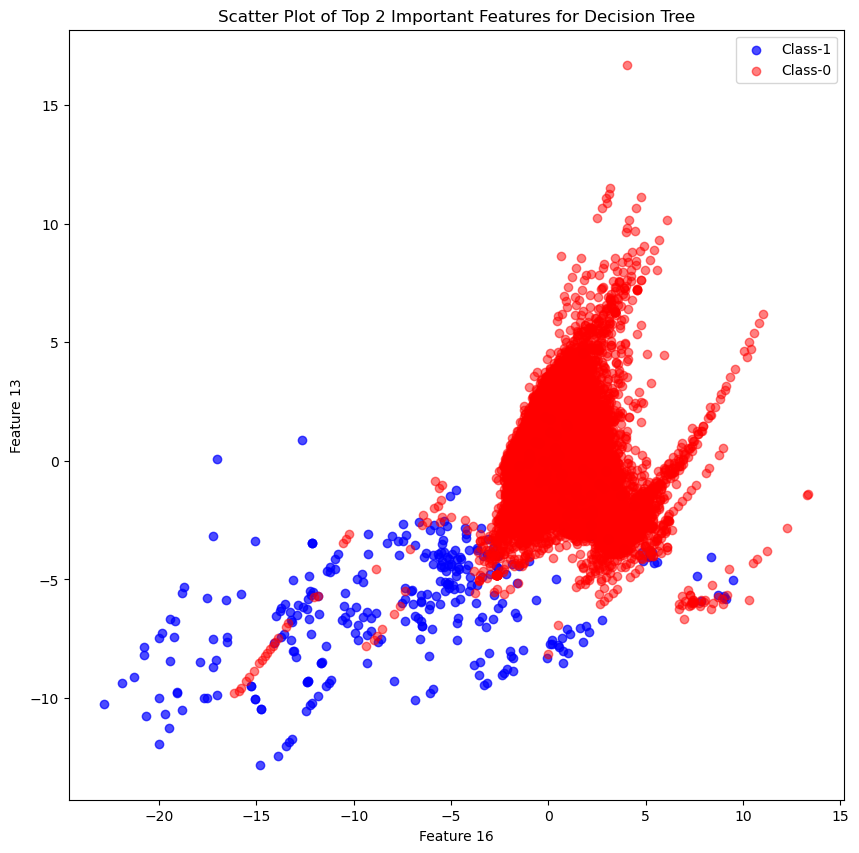

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, average_precision_score

# Step 1: Define and train the Decision Tree model with the best hyperparameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
auc_pr_dt = average_precision_score(y_test, y_pred_proba_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print Evaluation Results
print(f"Decision Tree F1-Score: {f1_dt:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree ROC AUC Score: {roc_auc_dt:.4f}")
print(f"Decision Tree AUC-PR: {auc_pr_dt:.4f}")
print("Confusion Matrix:\n", cm_dt)

# Step 3: Extract feature importances
var_imp_dt = dt_model.feature_importances_

# Step 4: Identify the indices of the top 3 features
print('Top var =', np.argsort(var_imp_dt)[-1] + 1)
print('2nd Top var =', np.argsort(var_imp_dt)[-2] + 1)
print('3rd Top var =', np.argsort(var_imp_dt)[-3] + 1)

# Step 5: Define the indices of the top 2 important features for plotting
top_var_index_dt = np.argsort(var_imp_dt)[-1]
second_top_var_index_dt = np.argsort(var_imp_dt)[-2]

# Step 6: Set up the plot and scatter the two top features for each class
plt.figure(figsize=(10, 10))
plt.scatter(
    X_train.loc[y_train == 1.0, X_train.columns[top_var_index_dt]],  # Change to .loc
    X_train.loc[y_train == 1.0, X_train.columns[second_top_var_index_dt]],  # Change to .loc
    label='Class-1', color='blue', alpha=0.7
)
plt.scatter(
    X_train.loc[y_train == 0.0, X_train.columns[top_var_index_dt]],  # Change to .loc
    X_train.loc[y_train == 0.0, X_train.columns[second_top_var_index_dt]],  # Change to .loc
    label='Class-0', color='red', alpha=0.5
)

# Adding title and labels
plt.title("Scatter Plot of Top 2 Important Features for Decision Tree")
plt.xlabel(f"Feature {top_var_index_dt}")
plt.ylabel(f"Feature {second_top_var_index_dt}")
plt.legend()
plt.show()

### 5.Random Forest

Random Forest F1-Score: 0.8455
Random Forest Accuracy: 0.9996
Random Forest ROC AUC Score: 0.9811
Random Forest AUC-PR: 0.8606
Confusion Matrix:
 [[85301     6]
 [   32   104]]
Top var = 17
2nd Top var = 12
3rd Top var = 14


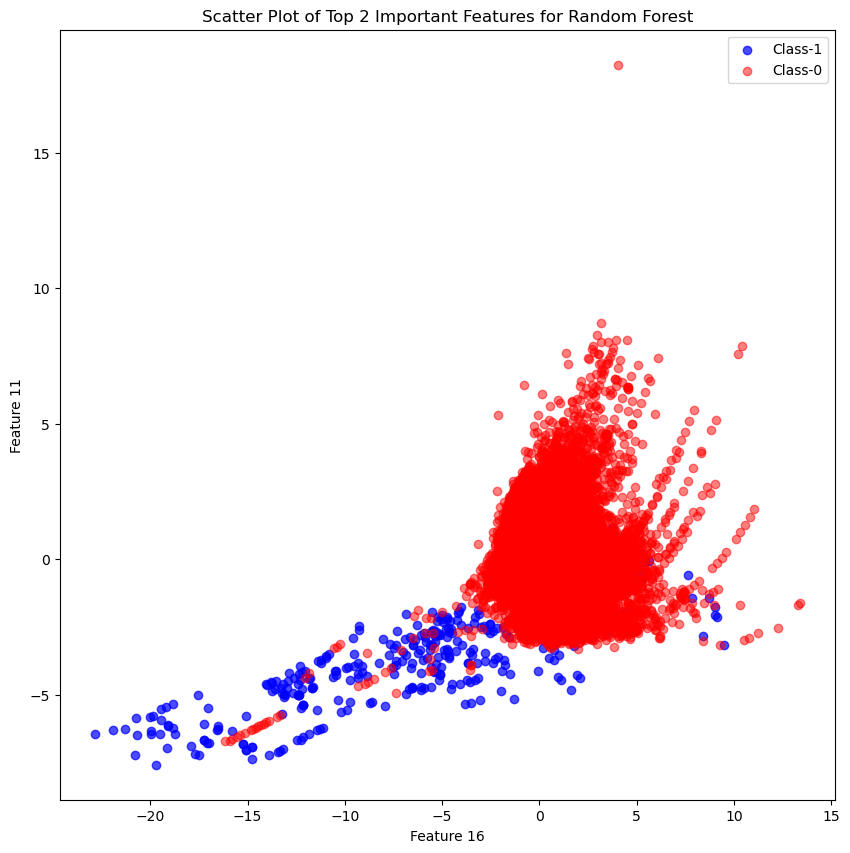

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, average_precision_score

# Step 1: Define and train the Random Forest model with the best hyperparameters
# rf_model = RandomForestClassifier(
#     n_estimators=300,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     max_features='log2',
#     max_depth=None,
#     random_state=42
# )

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_pred_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print Evaluation Results
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")
print(f"Random Forest AUC-PR: {auc_pr_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)

# Step 3: Extract feature importances
var_imp_rf = rf_model.feature_importances_

# Step 4: Identify the indices of the top 3 features
print('Top var =', np.argsort(var_imp_rf)[-1] + 1)
print('2nd Top var =', np.argsort(var_imp_rf)[-2] + 1)
print('3rd Top var =', np.argsort(var_imp_rf)[-3] + 1)

# Step 5: Define the indices of the top 2 important features for plotting
top_var_index_rf = np.argsort(var_imp_rf)[-1]
second_top_var_index_rf = np.argsort(var_imp_rf)[-2]

# Step 6: Set up the plot and scatter the two top features for each class
plt.figure(figsize=(10, 10))
plt.scatter(
    X_train.loc[y_train == 1.0, X_train.columns[top_var_index_rf]],  # Change to .loc
    X_train.loc[y_train == 1.0, X_train.columns[second_top_var_index_rf]],  # Change to .loc
    label='Class-1', color='blue', alpha=0.7
)
plt.scatter(
    X_train.loc[y_train == 0.0, X_train.columns[top_var_index_rf]],  # Change to .loc
    X_train.loc[y_train == 0.0, X_train.columns[second_top_var_index_rf]],  # Change to .loc
    label='Class-0', color='red', alpha=0.5
)

# Adding title and labels
plt.title("Scatter Plot of Top 2 Important Features for Random Forest")
plt.xlabel(f"Feature {top_var_index_rf}")
plt.ylabel(f"Feature {second_top_var_index_rf}")
plt.legend()
plt.show()

# --- Random Forest ---
# F1 Score: 0.8526
# Accuracy: 0.9996
# ROC AUC Score: 0.9797
# Top feature index = 16
# 2nd top feature index = 11
# 3rd top feature index = 10

### 6.XGBoost

XGBoost F1-Score: 0.8627
XGBoost Accuracy: 0.9996
XGBoost ROC AUC Score: 0.9838
XGBoost AUC-PR: 0.8740
Confusion Matrix:
 [[85298     9]
 [   26   110]]
Top var = 14
2nd Top var = 7
3rd Top var = 17


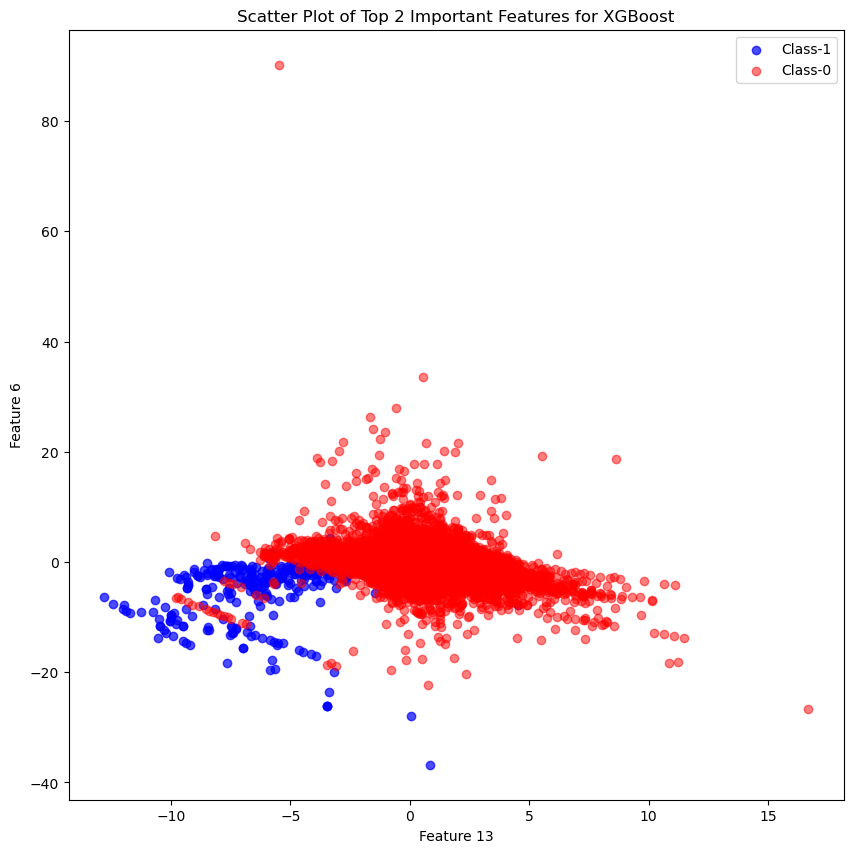

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, average_precision_score

# Step 1: Define and train the XGBoost model with the best hyperparameters
xgb_model = XGBClassifier(
    subsample=0.5,
    n_estimators=300,
    max_depth=3,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=0.7,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
f1 = f1_score(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
auc_pr = average_precision_score(y_test, y_pred_proba_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

# Print Evaluation Results
print(f"XGBoost F1-Score: {f1:.4f}")
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost ROC AUC Score: {roc_auc:.4f}")
print(f"XGBoost AUC-PR: {auc_pr:.4f}")
print("Confusion Matrix:\n", cm)

# Step 3: Extract feature importances
var_imp_xgb = xgb_model.feature_importances_

# Step 4: Identify the indices of the top 3 features
print('Top var =', np.argsort(var_imp_xgb)[-1] + 1)
print('2nd Top var =', np.argsort(var_imp_xgb)[-2] + 1)
print('3rd Top var =', np.argsort(var_imp_xgb)[-3] + 1)

# Step 5: Define the indices of the top 2 important features for plotting
top_var_index_xgb = np.argsort(var_imp_xgb)[-1]
second_top_var_index_xgb = np.argsort(var_imp_xgb)[-2]

# Step 6: Set up the plot and scatter the two top features for each class
plt.figure(figsize=(10, 10))
plt.scatter(
    X_train.loc[y_train == 1.0, X_train.columns[top_var_index_xgb]],  # Change to .loc
    X_train.loc[y_train == 1.0, X_train.columns[second_top_var_index_xgb]],  # Change to .loc
    label='Class-1', color='blue', alpha=0.7
)
plt.scatter(
    X_train.loc[y_train == 0.0, X_train.columns[top_var_index_xgb]],  # Change to .loc
    X_train.loc[y_train == 0.0, X_train.columns[second_top_var_index_xgb]],  # Change to .loc
    label='Class-0', color='red', alpha=0.5
)

# Adding title and labels
plt.title("Scatter Plot of Top 2 Important Features for XGBoost")
plt.xlabel(f"Feature {top_var_index_xgb}")
plt.ylabel(f"Feature {second_top_var_index_xgb}")
plt.legend()
plt.show()

### Printed the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [119]:

# --- Logistic Regression ---
# F1 Score: 0.7552
# Accuracy: 0.9993
# ROC AUC Score: 0.9824
# AUC-PR: 0.7863

# --- KNN ---
#     Not considered
    
# --- Logistic Regression ---
# F1 Score: 0.7552
# Accuracy: 0.9993
# ROC AUC Score: 0.9824
# AUC-PR: 0.7863    

# --- Decision Tree --- 
# Decision Tree F1-Score: 0.8078
# Decision Tree Accuracy: 0.9994
# Decision Tree ROC AUC Score: 0.8857
# Decision Tree AUC-PR: 0.7380

# --- Random Forest ---    
# Random Forest F1-Score: 0.8455
# Random Forest Accuracy: 0.9996
# Random Forest ROC AUC Score: 0.9811
# Random Forest AUC-PR: 0.8606

# --- XGBoost ---    
# XGBoost F1-Score: 0.8627
# XGBoost Accuracy: 0.9996
# XGBoost ROC AUC Score: 0.9838
# XGBoost AUC-PR: 0.8740

# Model Evaluation Metrics on y_test :

## Logistic Regression
- **F1 Score:** 0.7552
- **Accuracy:** 0.9993
- **ROC AUC Score:** 0.9824
- **AUC-PR:** 0.7863

---

## K-Nearest Neighbors (KNN)
- **Status:** Not considered

---

## Decision Tree
- **F1 Score:** 0.8078
- **Accuracy:** 0.9994
- **ROC AUC Score:** 0.8857
- **AUC-PR:** 0.7380

---

## Random Forest
- **F1 Score:** 0.8455
- **Accuracy:** 0.9996
- **ROC AUC Score:** 0.9811
- **AUC-PR:** 0.8606

---

## XGBoost
- **F1 Score:** 0.8627
- **Accuracy:** 0.9996
- **ROC AUC Score:** 0.9838
- **AUC-PR:** 0.8740

---

# Best Model Selection

## Best Model: **XGBoost**

### Reason for Choosing XGBoost:
XGBoost outperformed all other models in key metrics:
- **Highest F1 Score (0.8627)**: This indicates a good balance between precision and recall, making it suitable for imbalanced datasets.
- **Highest ROC AUC Score (0.9838)**: This score shows that XGBoost has an excellent ability to distinguish between positive and negative classes.
- **Highest AUC-PR (0.8740)**: This score further confirms its effectiveness in predicting positive instances, making it ideal for cases where positive prediction is crucial.

Overall, XGBoost's robust performance across all metrics makes it the best choice for this classification task.


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [122]:
!pip install imbalanced-learn

In [120]:
# Logistic Regression
from sklearn import linear_model #import the package

# Defining values of regularization strength (C) and number of cross-validation folds
num_C = [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strengths
cv_num = [5, 10]  # Different numbers of cross-validation folds

### Random Oversampling

In [128]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Sample DataFrame df (Replace this with your actual data)
# df = pd.read_csv('your_dataset.csv')

# Assuming you already have the data loaded as X and y
X = df.drop('Class', axis=1)  # Replace 'target' with your actual target column name
y = df['Class']                # Replace 'target' with your actual target column name

# Define values of regularization strength (C) and number of cross-validation folds
num_C = [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strengths
cv_num = [5, 10]  # Different numbers of cross-validation folds

# Prepare the StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for storing results
results = []

# Loop through each value of C
for c in num_C:
    # Initialize the model
    model = LogisticRegression(C=c, solver='lbfgs', max_iter=1000, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    
    # Fit the model on the whole training data
    model.fit(X, y)

    # Perform Random Oversampling on the training data
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    # Fit the model on the balanced training data
    model.fit(X_resampled, y_resampled)

    # Evaluate the model on the test set (assumed X_test_transformed and y_test are defined)
    y_pred = model.predict(X_test_transformed)
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
    
    # Store the results
    results.append({
        'C': c,
        'CV Mean ROC AUC': np.mean(cv_scores),
        'Test ROC AUC': roc_auc
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


         C  CV Mean ROC AUC  Test ROC AUC
0    0.001         0.983060      0.982599
1    0.010         0.980907      0.973106
2    0.100         0.975603      0.970001
3    1.000         0.973748      0.968930
4   10.000         0.973172      0.969274
5  100.000         0.973418      0.969112


### We can observe that there is very neglibible change in scores using RandomOverSampler, hence skipping the creation of Models with RandomOverSampler as there is no improvement expected in Mdoel performance.

### **SMOTE** **(Synthetic Minority Oversampling Technique)**

In [133]:
!pip install --upgrade scikit-learn imbalanced-learn numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


### Print the class distribution after applying SMOTE 

In [135]:
pip install --upgrade scikit-learn imbalanced-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# Create the SMOTE object with n_jobs=1
sm = SMOTE(random_state=27)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


NameError: name 'X_train' is not defined

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)